In [1]:
from fbprophet import Prophet
import pandas as pd
import numpy as np
import time

df = pd.read_csv("/Users/yangdongjae/Desktop/2020/대외활동/2020년 공공 빅데이터 청년 인턴십/실무형 프로젝트/Data/Core_Data_교차로별 사고현황.csv")

In [2]:
df['발생년월일시'] = df['발생년월일시'].astype(str)
df['발생년월일시'] = df['발생년월일시'].str[:-2]

In [3]:
df_sample = df[['발생년월일시' , '사망자수']]
df_sample = df_sample.rename({'발생년월일시':'ds' , '사망자수':'y'}, axis = 'columns')

df_sample

,ds,y
0,20120101,1
1,20120101,1
2,20120101,1
3,20120101,2
4,20120101,1
...,...,...
34140,20191204,1
34141,20191206,1
34142,20191218,1
34143,20191211,1


In [4]:
m = Prophet(changepoint_range = 0.9)
m.fit(df_sample)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [5]:
future = m.make_future_dataframe(periods = 365)
future.tail()

,ds
34505,2020-12-26
34506,2020-12-27
34507,2020-12-28
34508,2020-12-29
34509,2020-12-30


In [6]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
34505,2020-12-26,1.064509,0.754847,1.374657,1.047690,1.081351,-0.000455,-0.000455,-0.000455,0.005524,0.005524,0.005524,-0.005978,-0.005978,-0.005978,0.0,0.0,0.0,1.064054
34506,2020-12-27,1.064559,0.746403,1.380794,1.047685,1.081461,0.005030,0.005030,0.005030,0.011213,0.011213,0.011213,-0.006183,-0.006183,-0.006183,0.0,0.0,0.0,1.069589
34507,2020-12-28,1.064610,0.741467,1.360841,1.047682,1.081564,-0.010163,-0.010163,-0.010163,-0.003772,-0.003772,-0.003772,-0.006392,-0.006392,-0.006392,0.0,0.0,0.0,1.054446
34508,2020-12-29,1.064660,0.750442,1.366896,1.047681,1.081667,-0.001589,-0.001589,-0.001589,0.005015,0.005015,0.005015,-0.006604,-0.006604,-0.006604,0.0,0.0,0.0,1.063070
34509,2020-12-30,1.064710,0.727900,1.374517,1.047680,1.081770,-0.012709,-0.012709,-0.012709,-0.005890,-0.005890,-0.005890,-0.006819,-0.006819,-0.006819,0.0,0.0,0.0,1.052001


In [7]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
34505,2020-12-26,1.064509,0.754847,1.374657,1.047690,1.081351,-0.000455,-0.000455,-0.000455,0.005524,0.005524,0.005524,-0.005978,-0.005978,-0.005978,0.0,0.0,0.0,1.064054
34506,2020-12-27,1.064559,0.746403,1.380794,1.047685,1.081461,0.005030,0.005030,0.005030,0.011213,0.011213,0.011213,-0.006183,-0.006183,-0.006183,0.0,0.0,0.0,1.069589
34507,2020-12-28,1.064610,0.741467,1.360841,1.047682,1.081564,-0.010163,-0.010163,-0.010163,-0.003772,-0.003772,-0.003772,-0.006392,-0.006392,-0.006392,0.0,0.0,0.0,1.054446
34508,2020-12-29,1.064660,0.750442,1.366896,1.047681,1.081667,-0.001589,-0.001589,-0.001589,0.005015,0.005015,0.005015,-0.006604,-0.006604,-0.006604,0.0,0.0,0.0,1.063070
34509,2020-12-30,1.064710,0.727900,1.374517,1.047680,1.081770,-0.012709,-0.012709,-0.012709,-0.005890,-0.005890,-0.005890,-0.006819,-0.006819,-0.006819,0.0,0.0,0.0,1.052001


In [8]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(60)

,ds,yhat,yhat_lower,yhat_upper
34450,2020-11-01,1.067567,0.774033,1.391690
34451,2020-11-02,1.051828,0.737710,1.370844
34452,2020-11-03,1.059990,0.736143,1.383638
34453,2020-11-04,1.048600,0.729642,1.347626
34454,2020-11-05,1.051545,0.737791,1.338695
34455,2020-11-06,1.044450,0.701697,1.328038
34456,2020-11-07,1.059399,0.740893,1.380128
34457,2020-11-08,1.065157,0.751365,1.364144
34458,2020-11-09,1.050367,0.740014,1.328221
34459,2020-11-10,1.059464,0.767186,1.373697


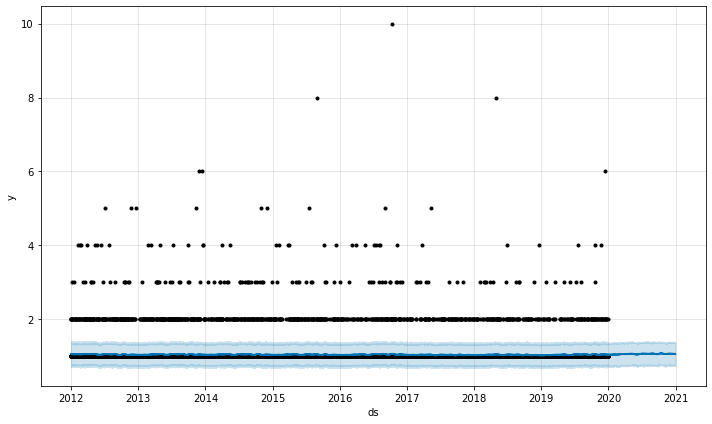

In [9]:
fig1 = m.plot(forecast)

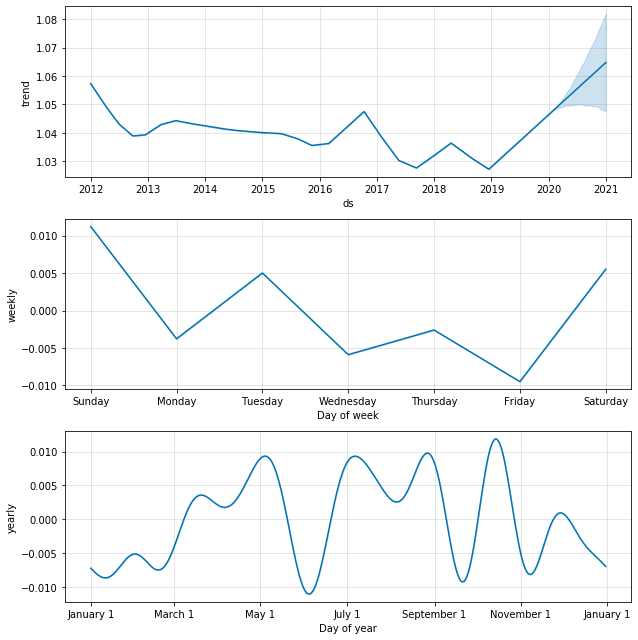

In [10]:
fig2 = m.plot_components(forecast)

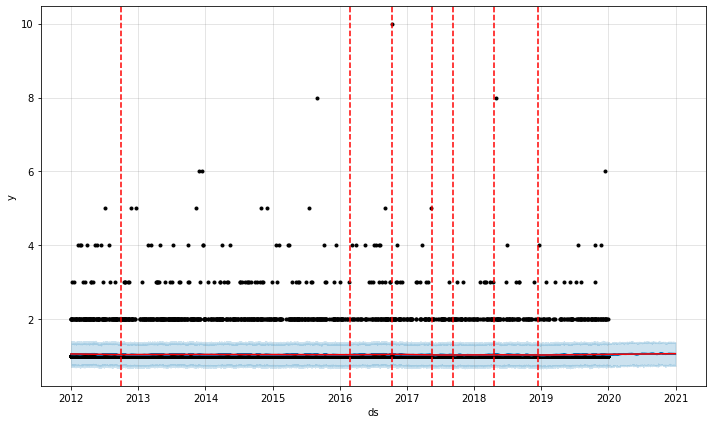

In [11]:
from fbprophet.plot import add_changepoints_to_plot

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [12]:
forecast = Prophet(interval_width = 0.95).fit(df_sample).predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
m = Prophet(mcmc_samples = 300)
forecast = m.fit(df_sample).predict(future)
fig = m.plot_components(forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
